<a href="https://colab.research.google.com/github/takumi5757/gamepilot/blob/master/MNIST%E3%82%B5%E3%83%B3%E3%83%97%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ディープラーニングで手書き数字の判定をしよう！

参考書籍: [すぐに使える! 業務で実践できる! PythonによるAI・機械学習・深層学習アプリのつくり方](http://www.socym.co.jp/book/1164) 

著:クジラ飛行机

[ソースコード(github)](https://github.com/kujirahand/book-mlearn-gyomu/tree/master/src/ch5/digits)
著者が本に書いたソースコードがgithubにあがっています。そのリンクです。

## Step1.MNISTのデータを利用する

MNISTとは

https://udemy.benesse.co.jp/ai/mnist.html

MNISTで提供される画像のデータ構造: 28x28ピクセル、グレースケール(0-255)

Epoch 1/12
469/469 [==============================] - 4s 9ms/step - loss: 0.2256 - accuracy: 0.9323 - val_loss: 0.0559 - val_accuracy: 0.9818
Epoch 2/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0810 - accuracy: 0.9762 - val_loss: 0.0386 - val_accuracy: 0.9862
Epoch 3/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0635 - accuracy: 0.9816 - val_loss: 0.0348 - val_accuracy: 0.9885
Epoch 4/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0532 - accuracy: 0.9847 - val_loss: 0.0327 - val_accuracy: 0.9898
Epoch 5/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0474 - accuracy: 0.9863 - val_loss: 0.0311 - val_accuracy: 0.9895
Epoch 6/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0442 - accuracy: 0.9874 - val_loss: 0.0307 - val_accuracy: 0.9895
Epoch 7/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0407 - accuracy: 0.9880 - val_loss: 0.0329 - val_accuracy: 0.9892
Epoch 

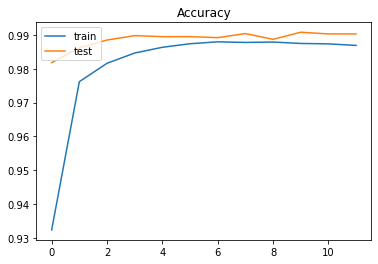

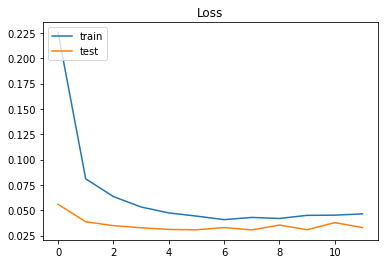

In [21]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 入力と出力を指定
in_shape = (28, 28, 1)
out_size = 10


# MNISTのデータを読み込み 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# データを(1, 28, 28)の三次元配列に変換
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y_train = keras.utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.to_categorical(y_test.astype('int32'),10)

# CNNモデル構造を定義 --- (*2)
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=in_shape))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(out_size, activation='softmax'))

# モデルを構築 --- (*3)
model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*4)
hist = model_cnn.fit(X_train, y_train,
          batch_size=128, 
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

# モデルを評価 --- (*5)
score = model_cnn.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*6)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

/content


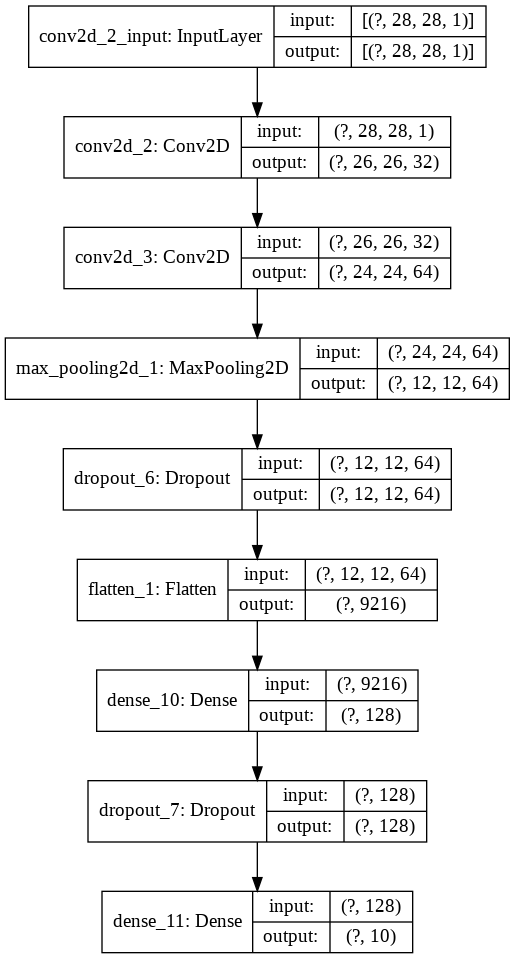

In [22]:
!pwd
# 現在のディレクトリにモデルを画像化したものを保存
keras.utils.plot_model(model_cnn, to_file='model.png', show_shapes=True)

読み込んだ元画像


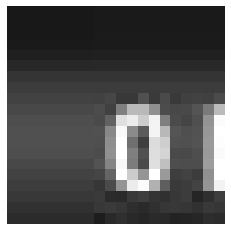

実際にモデルに流し込む画像


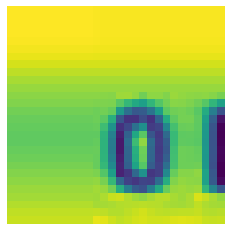

この画像の数字は2です 

読み込んだ元画像


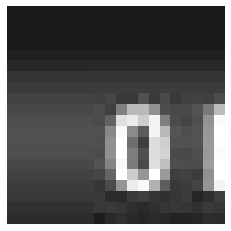

実際にモデルに流し込む画像


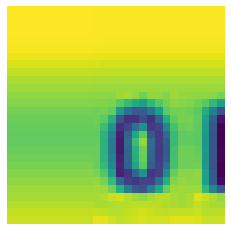

この画像の数字は2です 

読み込んだ元画像


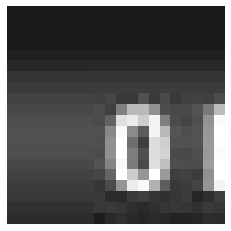

実際にモデルに流し込む画像


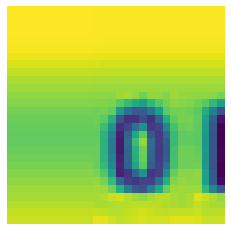

この画像の数字は2です 



In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_number(filename):
  # 読み込み
  img = cv2.imread(filename)
  # 読み込んだ画像を表示する
  print("読み込んだ元画像")
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  # 読み込み画像をリサイズ
  img = cv2.resize(img,(28,28))
 
  # ネガポジ反転
  img = 255 - img
  
  # モデルに流し込む画像を表示する
  print("実際にモデルに流し込む画像")
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  
  # CNNモデルに対応するようにデータを(1, 28, 28)の三次元配列に変換
  img = img.reshape(1, 28, 28, 1).astype('float32') / 255
  # 予測 (以前学習したCNNのモデルを使ってるので注意)
  ret = model_cnn.predict(img)
  return ret

images = []
for i in range(3):
    images.append(f"speed_value_{i}.jpg")
for image in images:
    # 画像ファイルを指定
    ans = predict_number(image)
    print("この画像の数字は" +  str(np.argmax(ans)) + "です \n")